<a href="https://colab.research.google.com/github/Het0c/InformeCSgo/blob/main/Informe_Tecnico_FMY0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

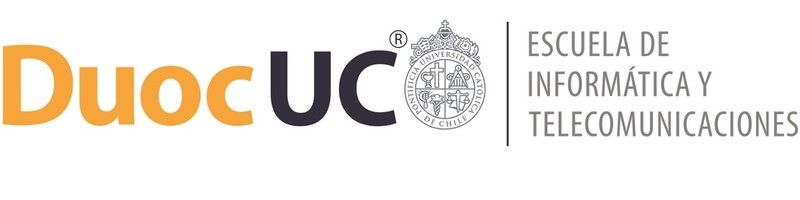

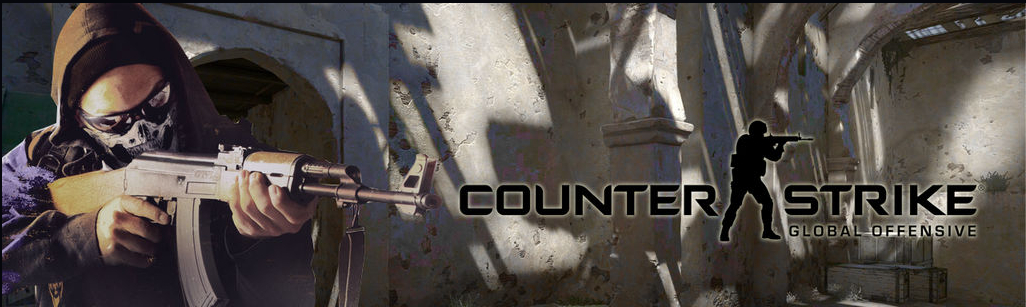

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Hector Lopez
*

Docente:     

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


## preguntas de negocio:

* ¿Cómo influye el porcentaje de uso del rifle sniper (arma primaria) en el rendimiento del jugador, considerando variables como kills, headshots, y probabilidad de ganar la ronda o la partida?

* ¿Podemos predecir si un jugador sobrevivirá a una ronda basándonos en sus estadísticas de desempeño?

* ¿Cuál será el número de kills que un jugador realizará en una ronda en función de su estilo de juego y estadísticas previas?

$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

In [5]:
#Importacion de librerias para investigacion
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Carga de archivo por
file_path = '/Anexo ET_demo_round_traces_2022.csv'
df = pd.read_csv(file_path, sep=None, engine='python')
df.head(3)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0


## Fase 1: Business Understanding

Valve ha identificado una oportunidad para mejorar la experiencia de juego en Counter Strike: Global Offensive (CS:GO) al enfocarse en el análisis de datos de rendimiento y emparejamiento de jugadores. El objetivo es desarrollar modelos predictivos mediante Machine Learning para:
- Identificar factores clave de rendimiento: Evaluar las acciones individuales y colectivas de los jugadores durante las partidas para detectar patrones regulares o irregulares que influyen en el desempeño.
- Optimizar el sistema de emparejamiento: Mejorar los algoritmos actuales para crear equipos más equilibrados y competitivos, lo que resultará en una experiencia más satisfactoria para los jugadores.
- Anticipar resultados y recomendar estrategias: Usar predicciones para ayudar a jugadores y equipos a adaptarse en tiempo real y lograr mejores rendimientos.


In [9]:
print("\nPrimeras 5 filas:")
display(df.head())

print("\nResumen estadístico:")
display(df.describe())



Primeras 5 filas:


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0



Resumen estadístico:


,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [10]:
# Eliminar columnas innecesarias si existen
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64


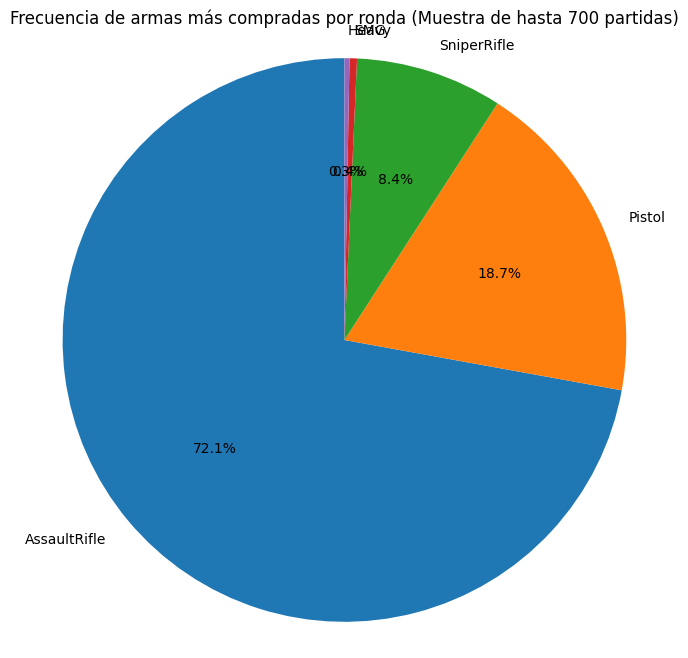

In [11]:
import matplotlib.pyplot as plt

# Filtrar jugadores con al menos una kill por ronda
df_kills = df[
    (df['MatchKills'] > 0) |
    (df['MatchFlankKills'] > 0) |
    (df['MatchAssists'] > 0) |
    (df['MatchHeadshots'] > 0)
]

# Tomar una muestra de hasta 700 jugadores/partidas
df_kills_sampled = df_kills.sample(n=min(700, len(df_kills)), random_state=42)

# Crear una columna para el arma primaria más usada
df_kills_sampled['PrimaryWeaponUsed'] = df_kills_sampled[
    ['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy', 'PrimaryPistol']
].idxmax(axis=1)
df_kills_sampled['PrimaryWeaponUsed'] = df_kills_sampled['PrimaryWeaponUsed'].str.replace('Primary', '')  # Quitar el prefijo "Primary"

# Contar la frecuencia de cada arma
weapon_counts = df_kills_sampled['PrimaryWeaponUsed'].value_counts()

# Crear el gráfico de pie mostrando todas las armas
plt.figure(figsize=(8, 8))
plt.pie(weapon_counts, labels=weapon_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Frecuencia de armas más compradas por ronda (Muestra de hasta 700 partidas)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Valores nulos por columna:
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64

In

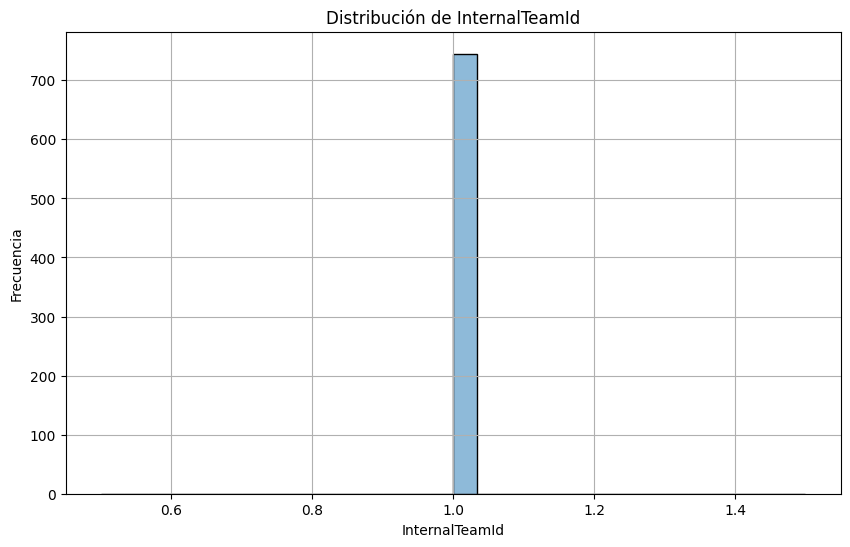

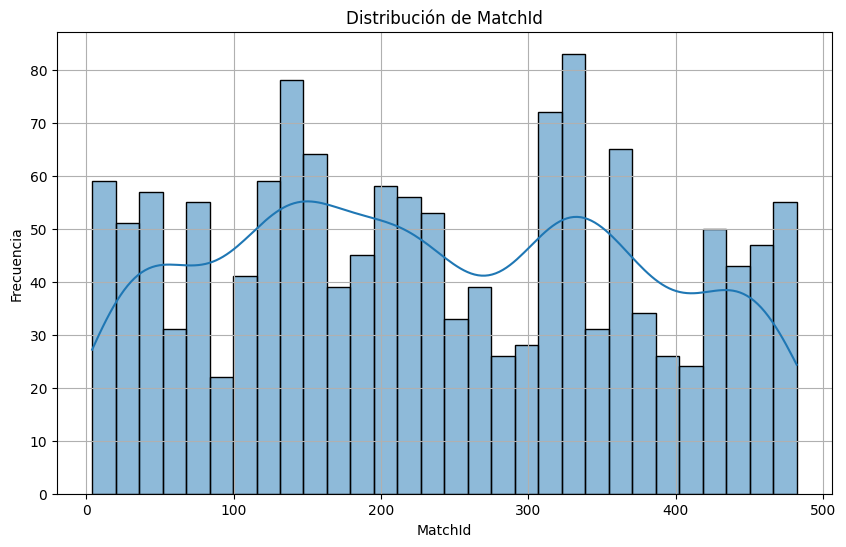

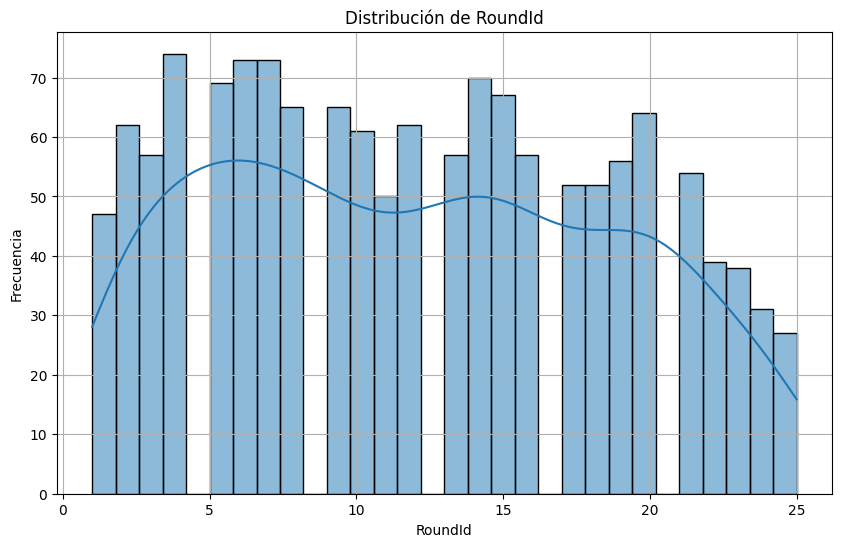

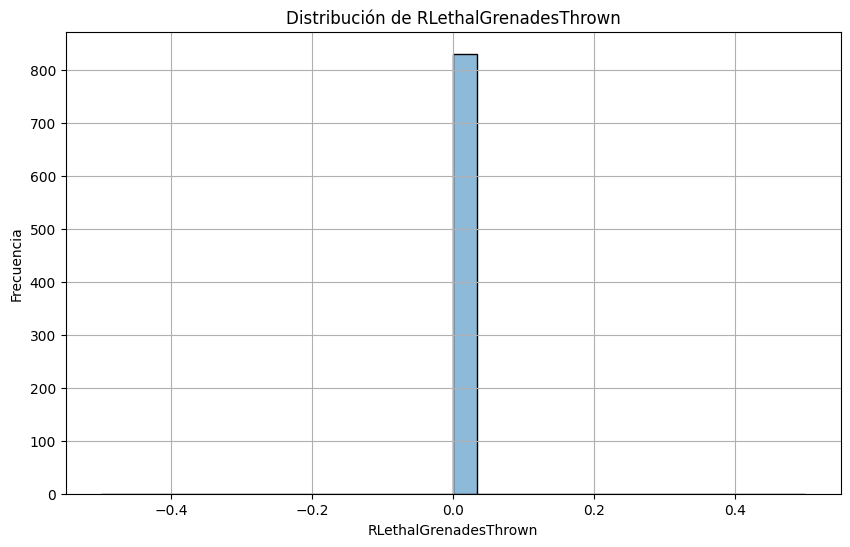

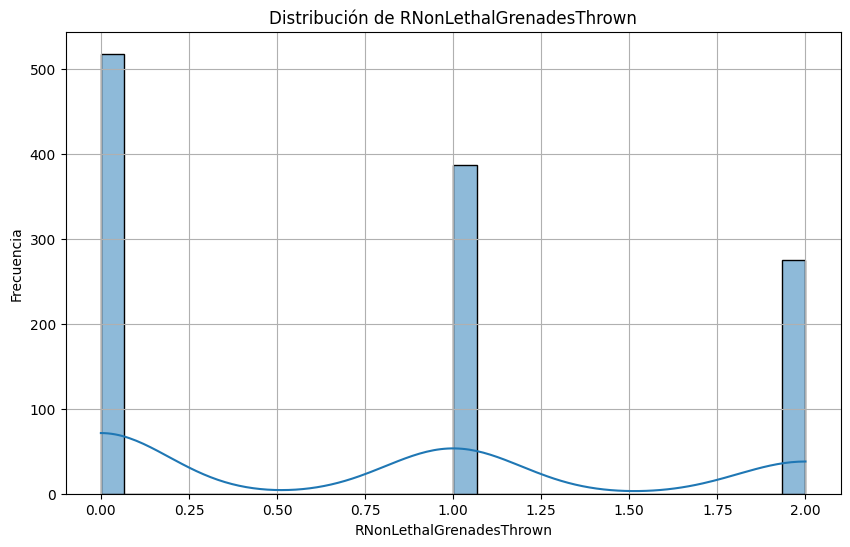

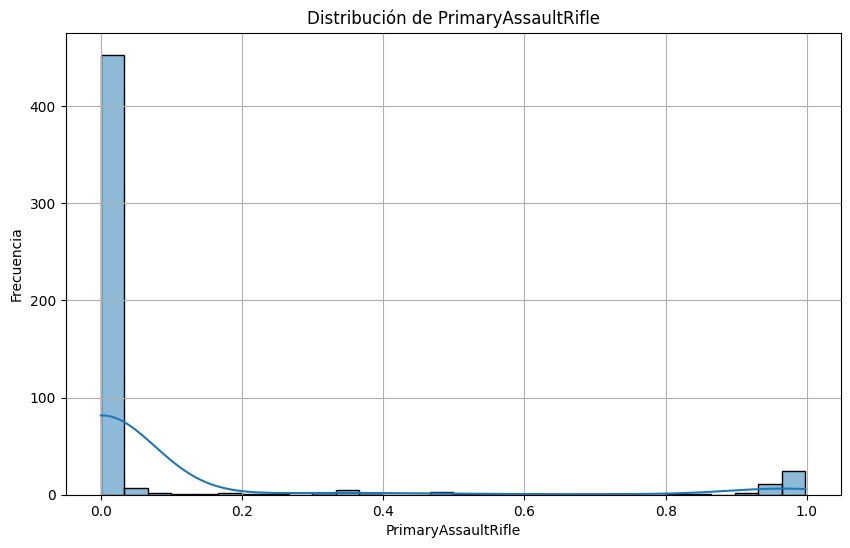

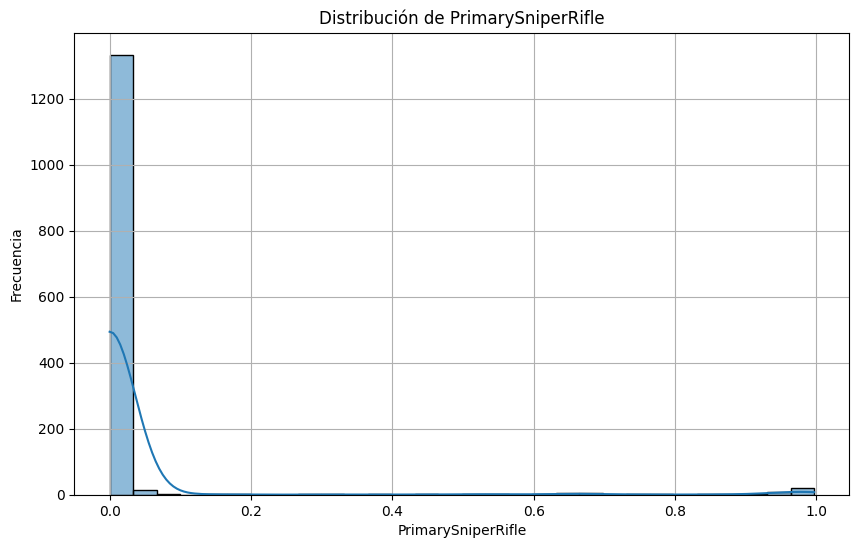

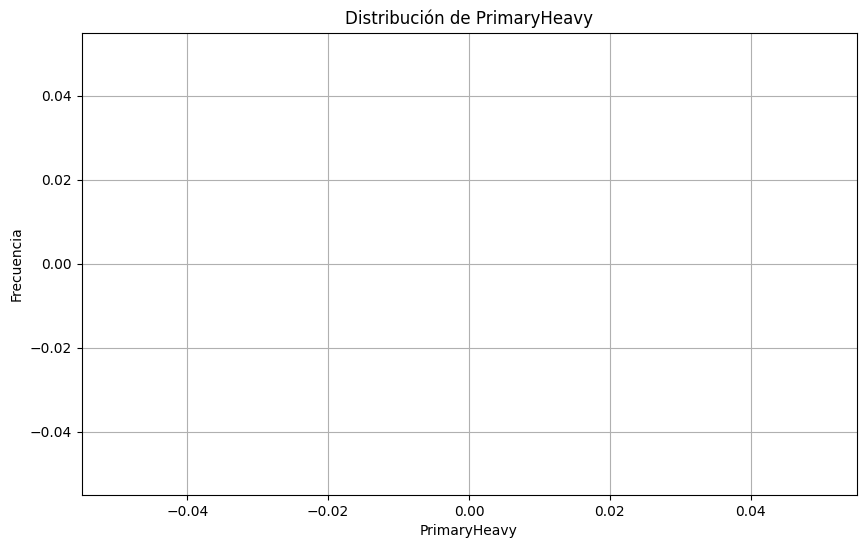

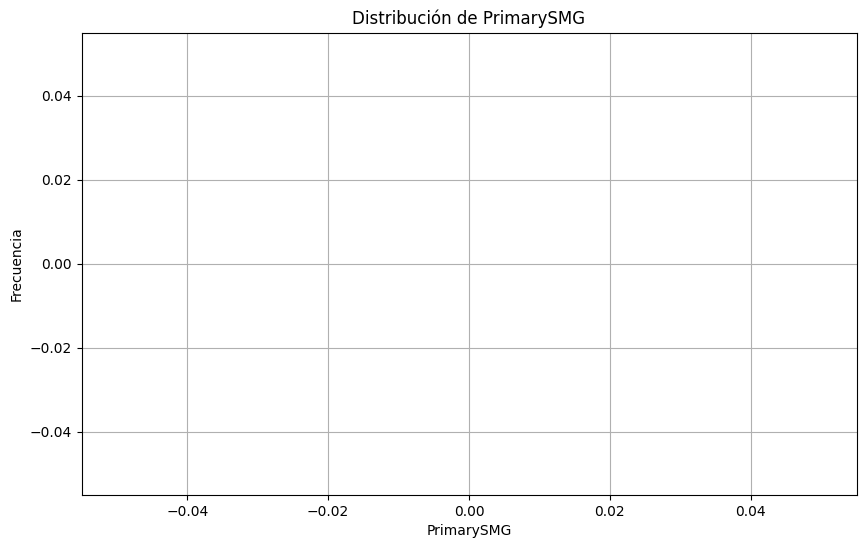

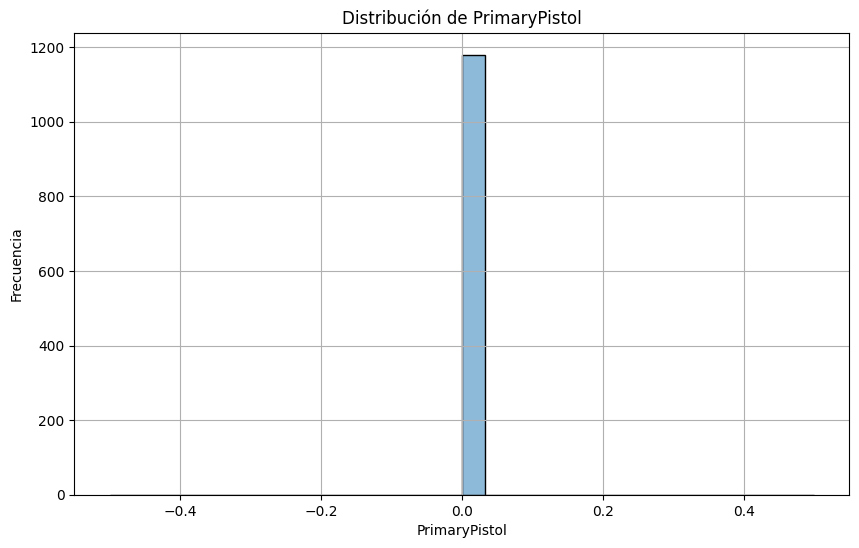

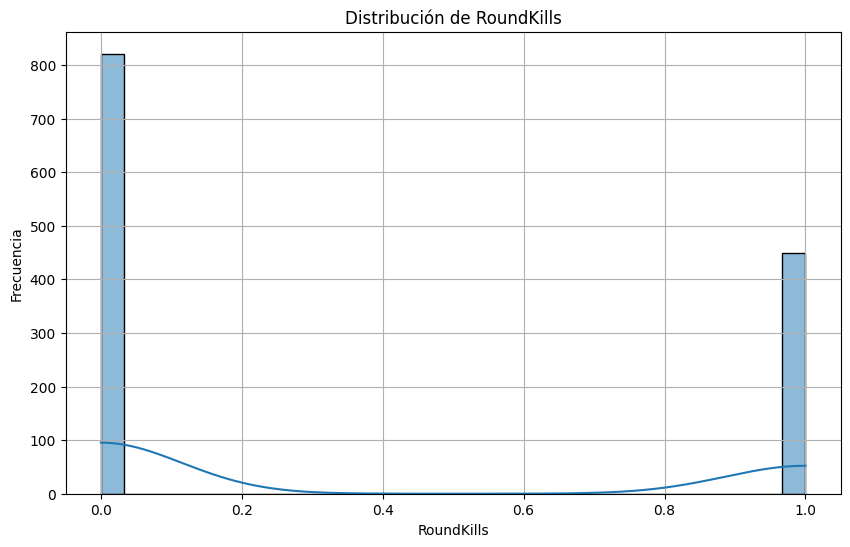

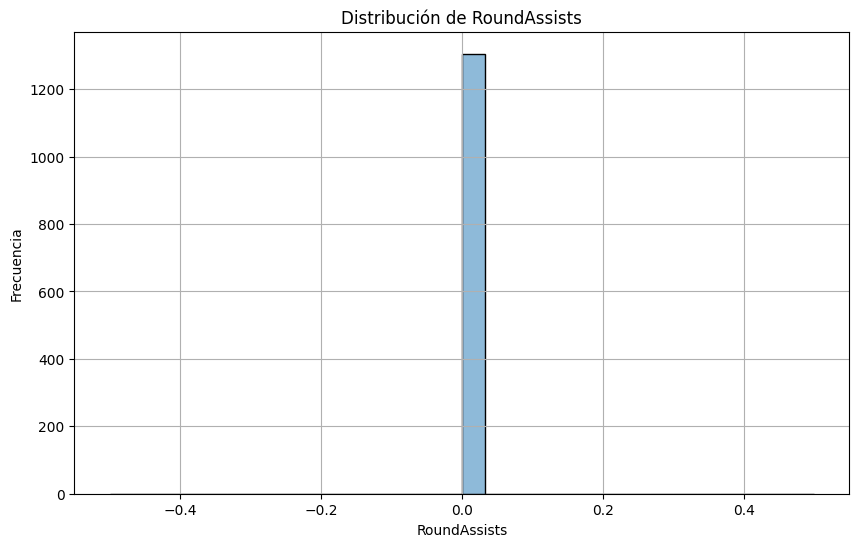

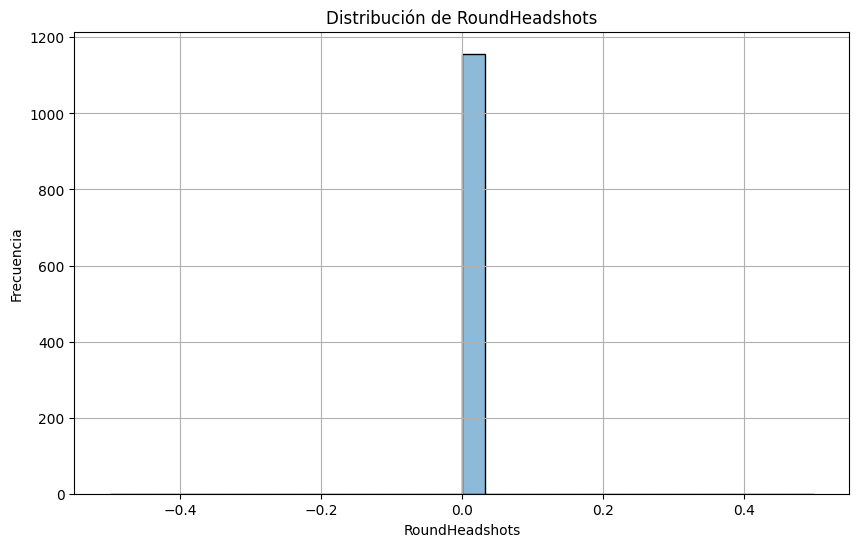

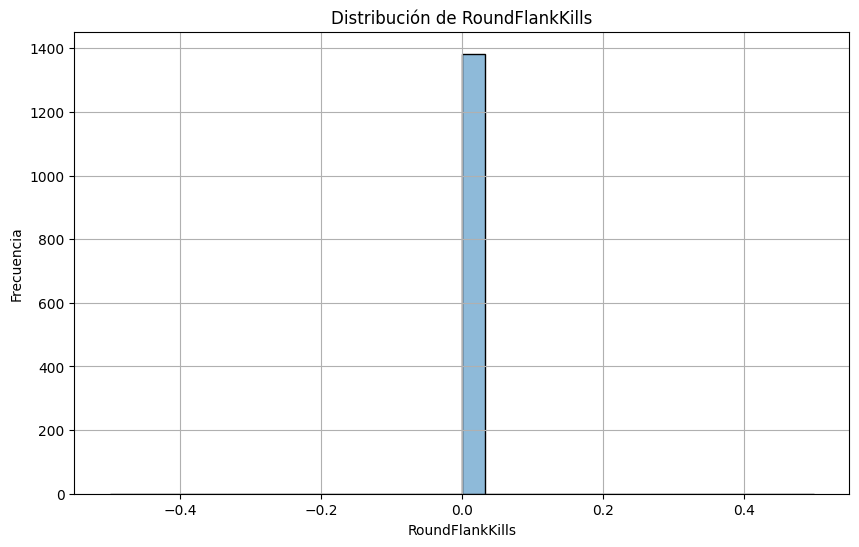

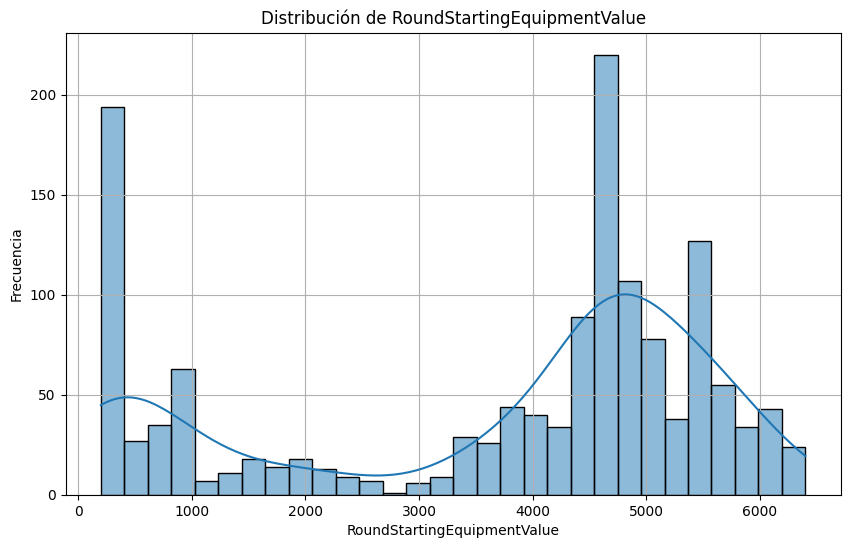

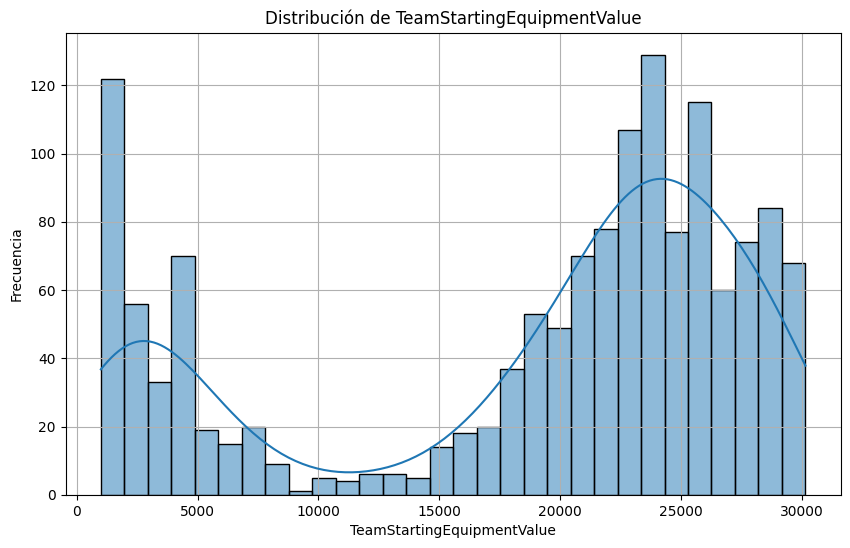

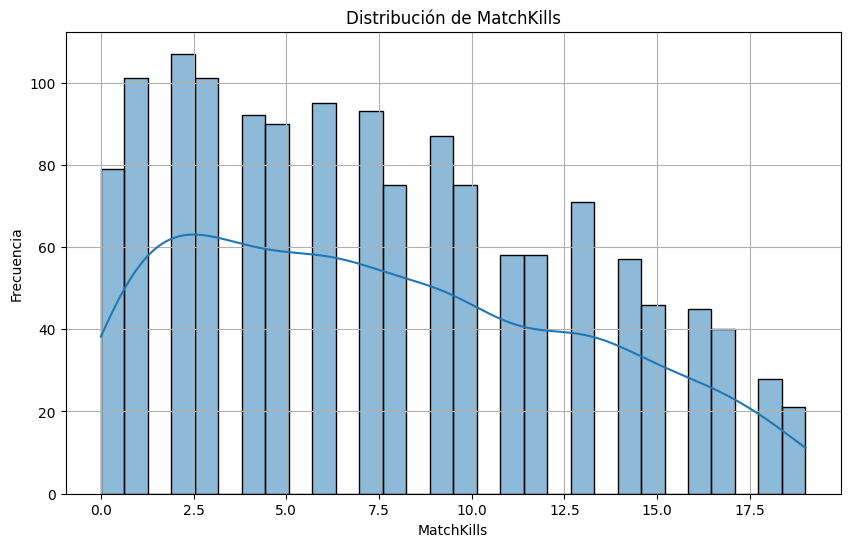

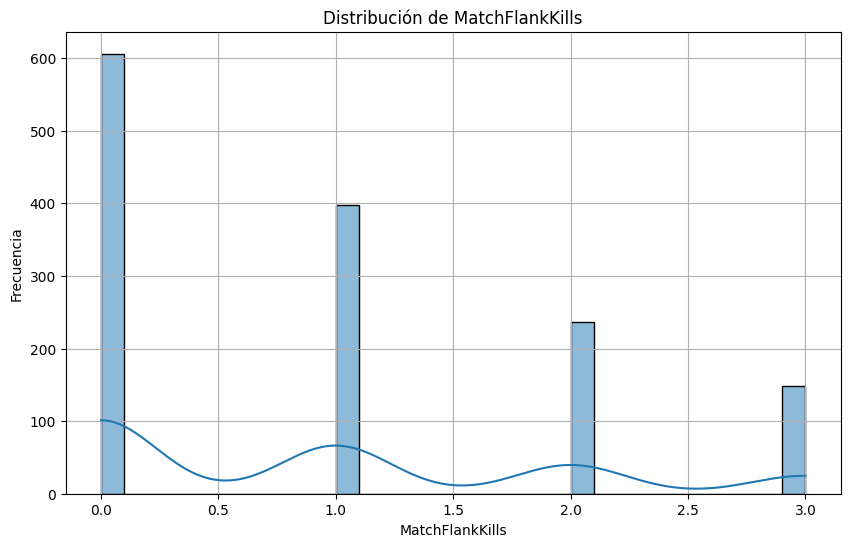

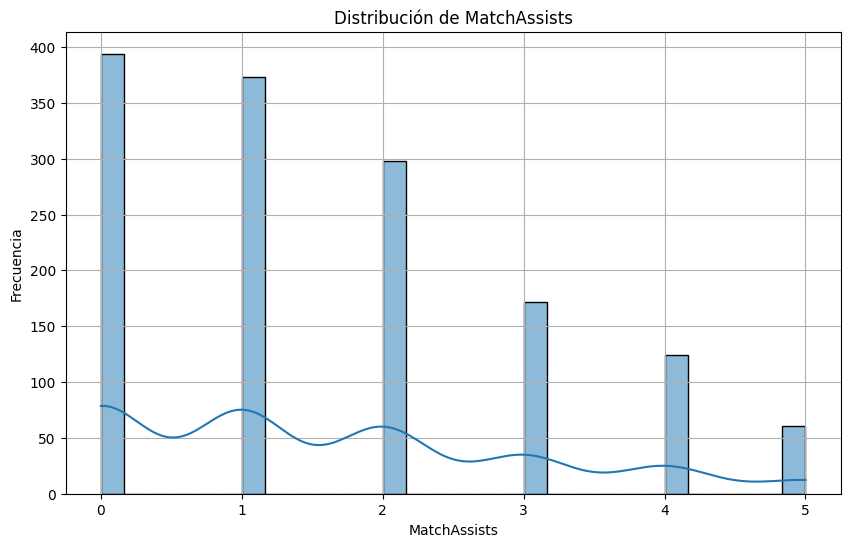

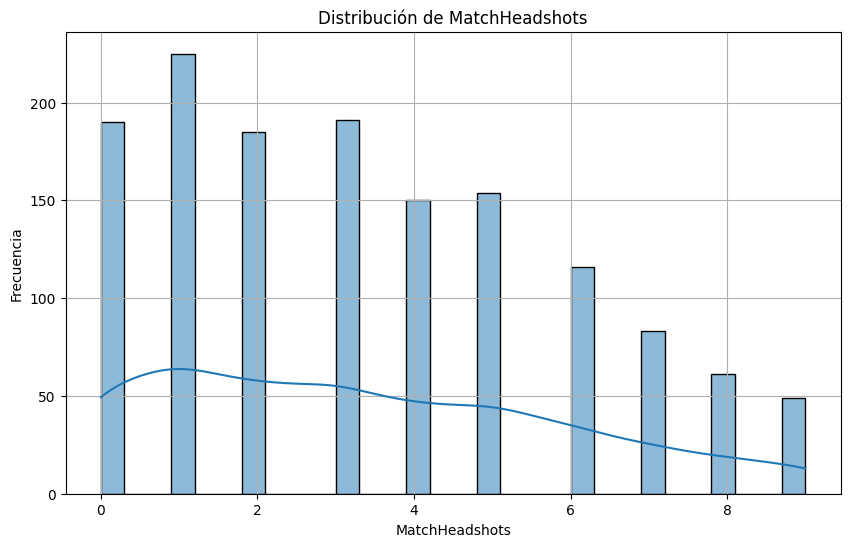

In [12]:
# 1. Limpieza inicial
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Información general del dataset
print("\nInformación general del dataset:")
print(df.info())

# 2. Muestra aleatoria (para rendimiento si es necesario)
sample_df = df.sample(n=min(1500, len(df)), random_state=42)

# 3. Identificación de variables numéricas
numeric_vars = sample_df.select_dtypes(include='number').columns
print("\nVariables numéricas detectadas:", list(numeric_vars))

# 4. Visualización de distribuciones de cada variable numérica
for var in numeric_vars:
    plt.figure(figsize=(10, 6))
    # Eliminar extremos superiores para mejor visualización (outliers)
    df_filtered = sample_df[sample_df[var] < sample_df[var].quantile(0.95)]
    sns.histplot(df_filtered[var], bins=30, kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


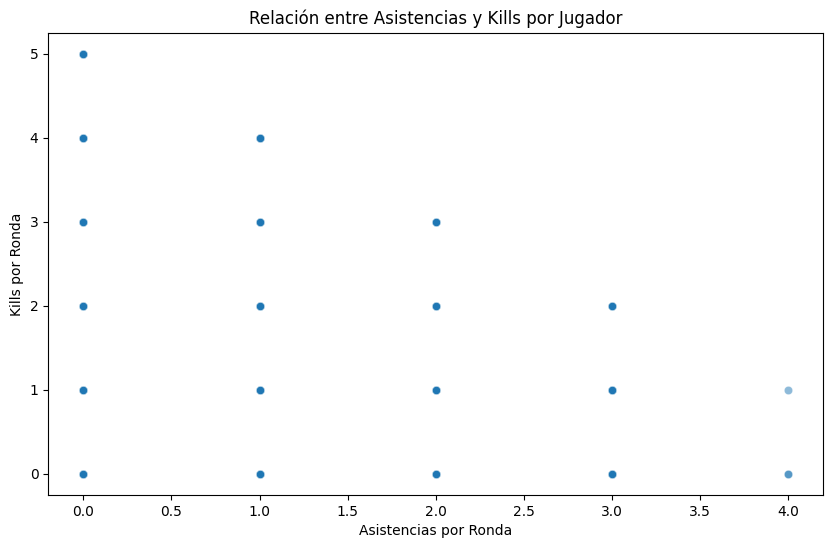

Correlación entre Asistencias y Kills: -0.021481967672222574


In [13]:
# Relación entre Asistencias y Kills
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RoundAssists', y='RoundKills', alpha=0.5)
plt.title('Relación entre Asistencias y Kills por Jugador')
plt.xlabel('Asistencias por Ronda')
plt.ylabel('Kills por Ronda')
plt.show()

# Calcular la correlación entre Asistencias y Kills
correlacion = df[['RoundAssists', 'RoundKills']].corr().iloc[0, 1]
print(f"Correlación entre Asistencias y Kills: {correlacion}")

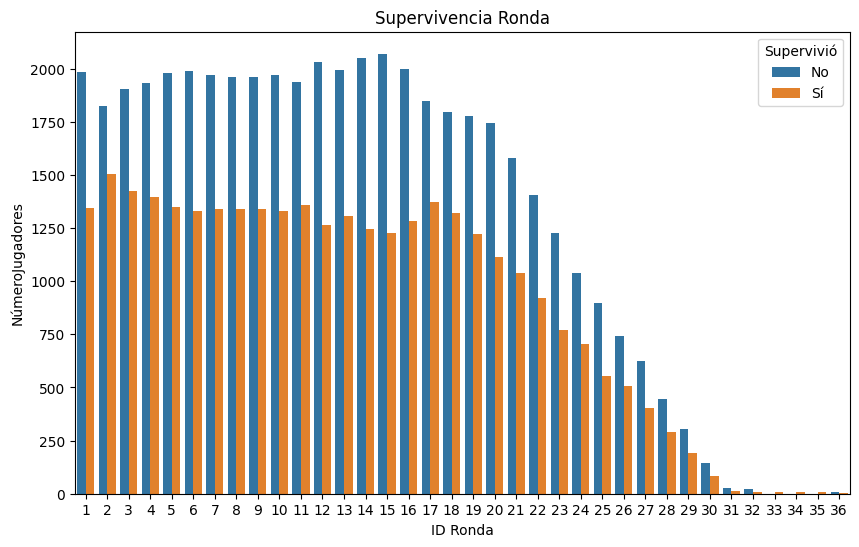

In [25]:
#relación entre supervivencia y ronda
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RoundId', hue='Survived')
plt.title('Supervivencia Ronda')
plt.xlabel('ID Ronda')
plt.ylabel('NúmeroJugadores')
plt.legend(title='Supervivió', loc='upper right', labels=['No', 'Sí'])
plt.show()

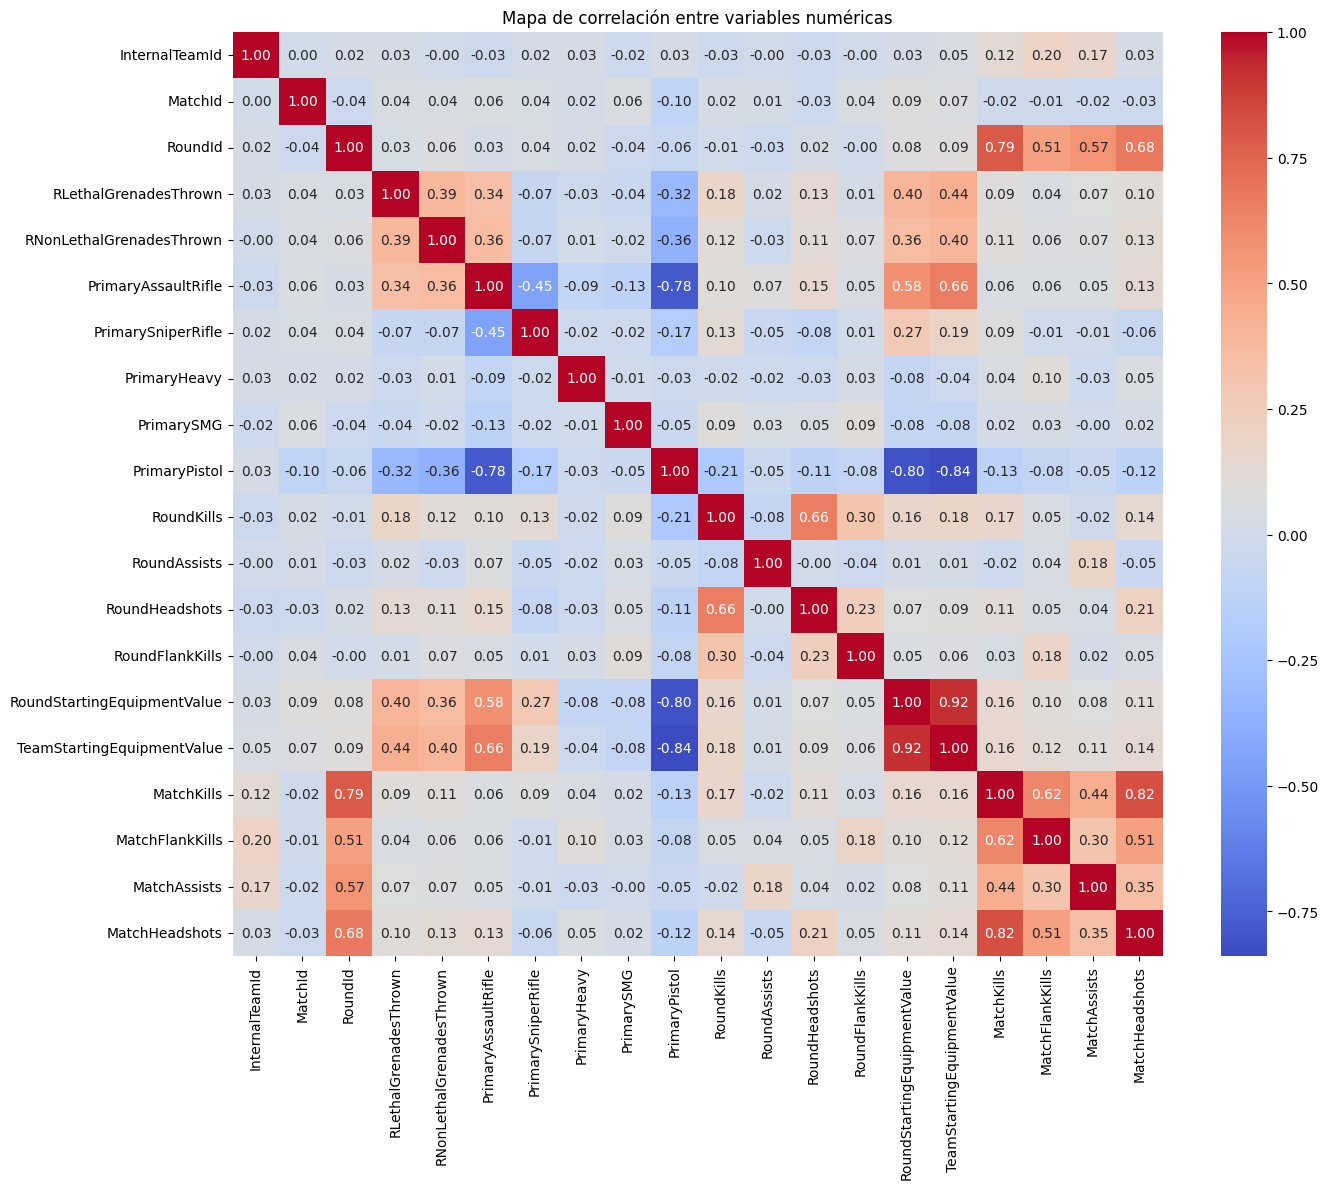

In [20]:
#Mapa de correlaciones
plt.figure(figsize=(15, 12))
correlation = sample_df[numeric_vars].corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Mapa de correlación entre variables numéricas')
plt.show()

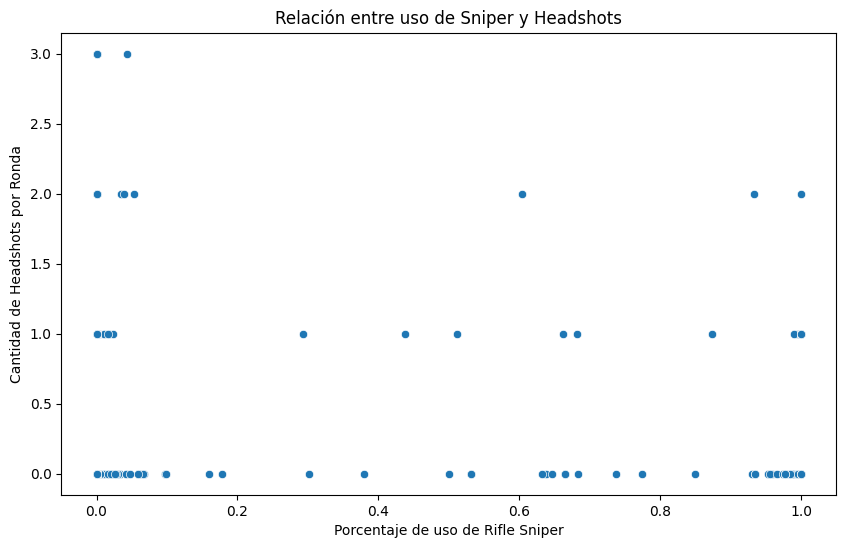

Correlación entre uso de Sniper y Headshots: -0.07419818550914226


<ipython-input-30-9430fca2aa71>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sniper_users['RoundKills'], label='Usuarios de Sniper', shade=True)
<ipython-input-30-9430fca2aa71>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(other_weapon_users['RoundKills'], label='Otros Usuarios', shade=True)


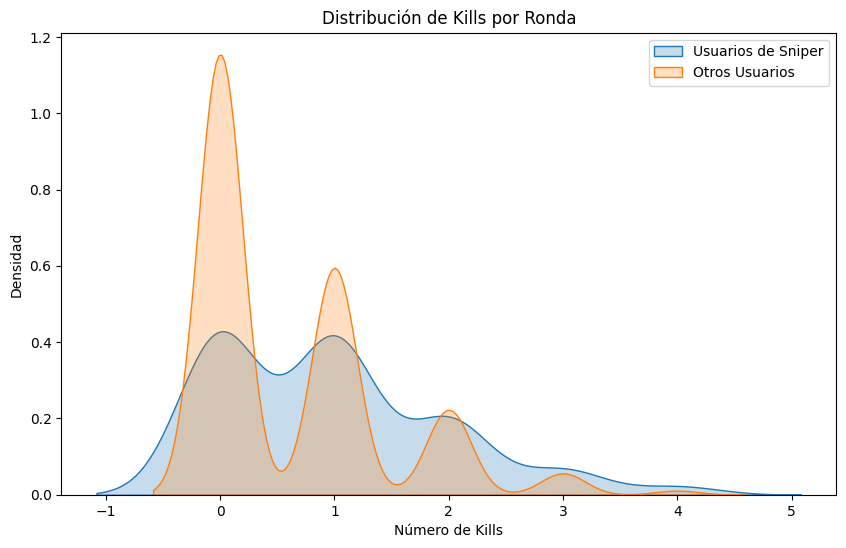

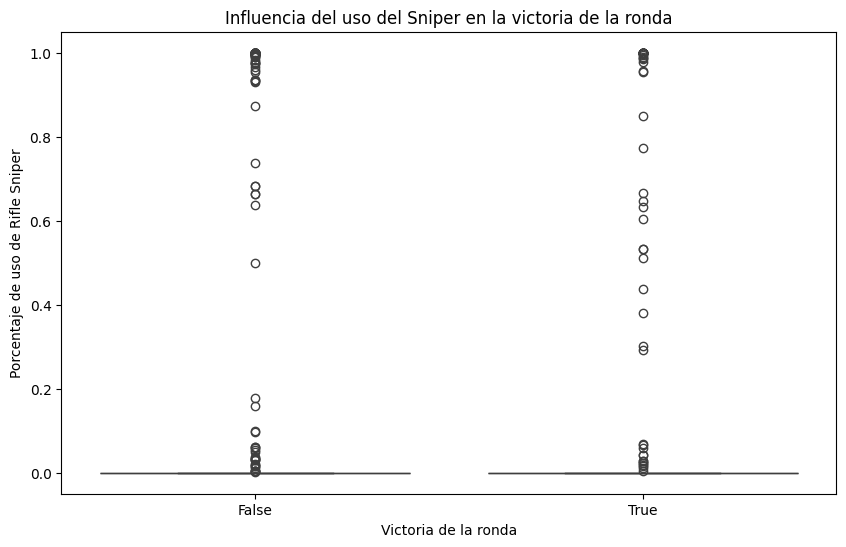

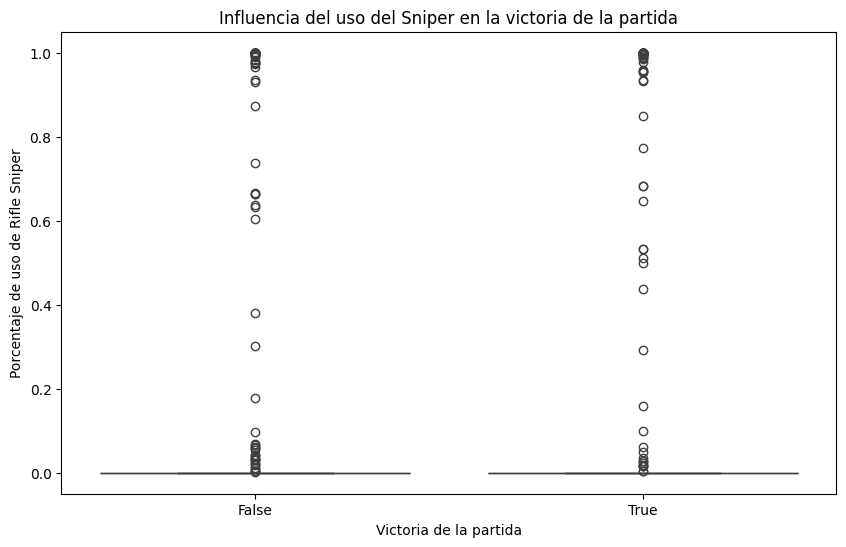

In [30]:
#Objetivo 1: Investigar si existe una relación positiva entre el uso del rifle sniper y la cantidad de headshots.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df, x='PrimarySniperRifle', y='RoundHeadshots')
plt.title('Relación entre uso de Sniper y Headshots')
plt.xlabel('Porcentaje de uso de Rifle Sniper')
plt.ylabel('Cantidad de Headshots por Ronda')
plt.show()

# Calcular la correlación
correlation_sniper_headshots = sample_df['PrimarySniperRifle'].corr(sample_df['RoundHeadshots'])
print(f"Correlación entre uso de Sniper y Headshots: {correlation_sniper_headshots}")


#Objetivo 2: Evaluar si los jugadores que usan el sniper como arma principal tienen diferencias significativas en otros KPIs.
# Comparar distribuciones de kills para usuarios de sniper vs otras armas

sniper_users = sample_df[sample_df['PrimarySniperRifle'] > sample_df['PrimarySniperRifle'].mean()]
other_weapon_users = sample_df[sample_df['PrimarySniperRifle'] <= sample_df['PrimarySniperRifle'].mean()]

plt.figure(figsize=(10, 6))
sns.kdeplot(sniper_users['RoundKills'], label='Usuarios de Sniper', shade=True)
sns.kdeplot(other_weapon_users['RoundKills'], label='Otros Usuarios', shade=True)
plt.title('Distribución de Kills por Ronda')
plt.xlabel('Número de Kills')
plt.ylabel('Densidad')
plt.legend()
plt.show()


#Objetivo 3: Establecer si el patrón de uso del sniper se puede considerar un factor predictivo para ganar rondas o partidas.

plt.figure(figsize=(10, 6))
sns.boxplot(x='RoundWinner', y='PrimarySniperRifle', data=sample_df)
plt.title('Influencia del uso del Sniper en la victoria de la ronda')
plt.xlabel('Victoria de la ronda')
plt.ylabel('Porcentaje de uso de Rifle Sniper')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='MatchWinner', y='PrimarySniperRifle', data=sample_df)
plt.title('Influencia del uso del Sniper en la victoria de la partida')
plt.xlabel('Victoria de la partida')
plt.ylabel('Porcentaje de uso de Rifle Sniper')
plt.show()


## Fase 2: Data Understanding


Descripción estadística del uso del rifle Sniper:
count    1500.000000
mean        0.094294
std         0.284660
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PrimarySniperRifle, dtype: float64

Descripción estadística del rendimiento:
        MatchKills  MatchHeadshots  MatchAssists
count  1500.000000     1500.000000    1500.00000
mean      8.428000        3.912000       1.88400
std       6.067951        3.227672       1.85459
min       0.000000        0.000000       0.00000
25%       3.000000        1.000000       0.00000
50%       7.000000        3.000000       1.00000
75%      13.000000        6.000000       3.00000
max      31.000000       18.000000      11.00000

Tipos de datos:
Unnamed: 0                       int64
Map                             object
Team                            object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
RoundW

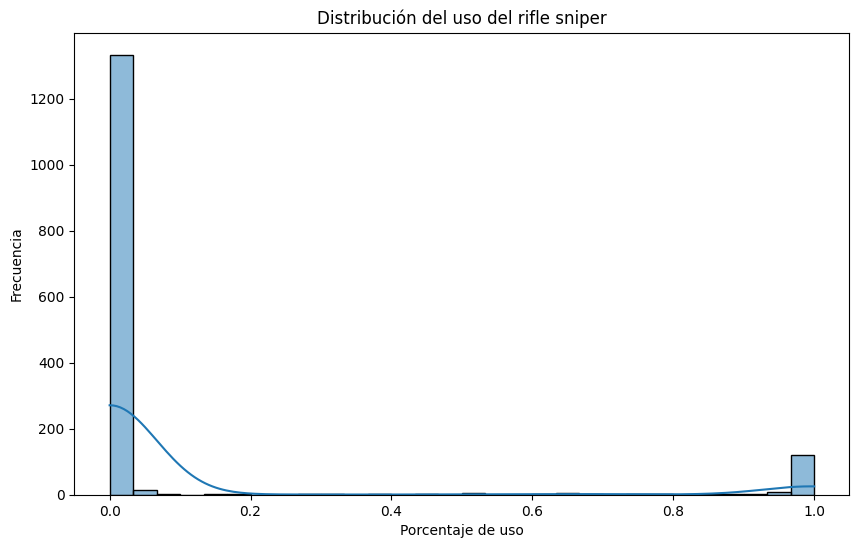

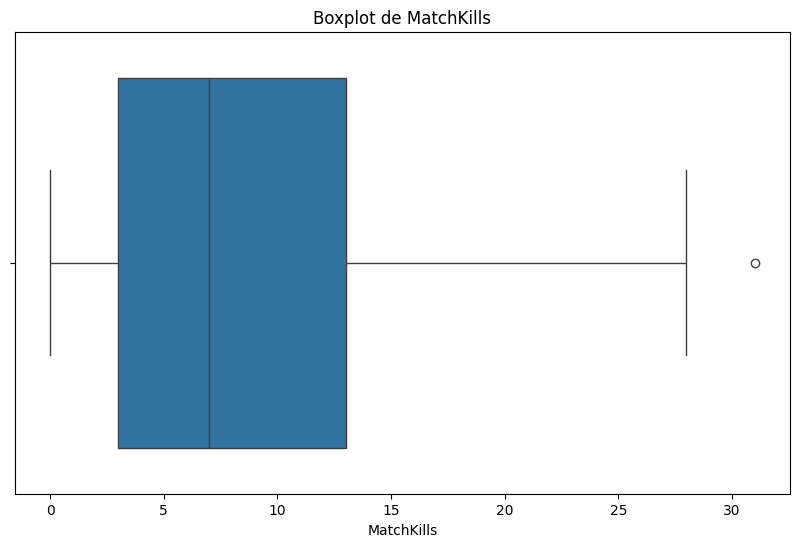

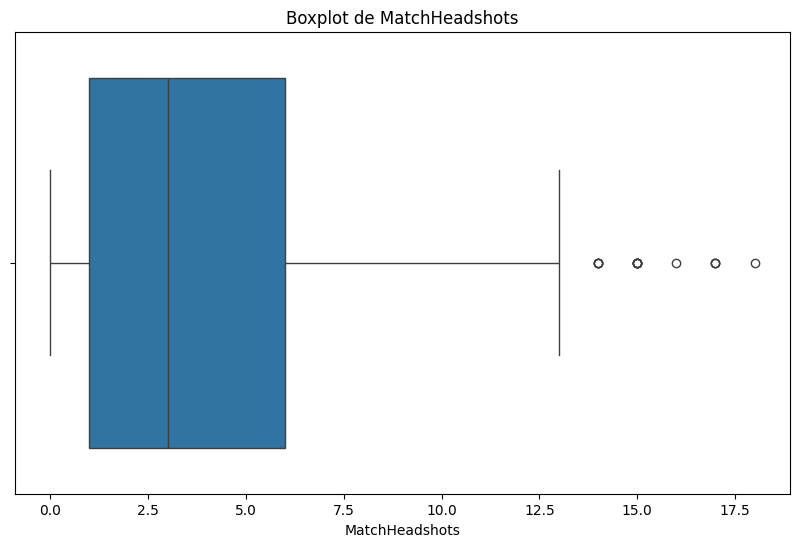

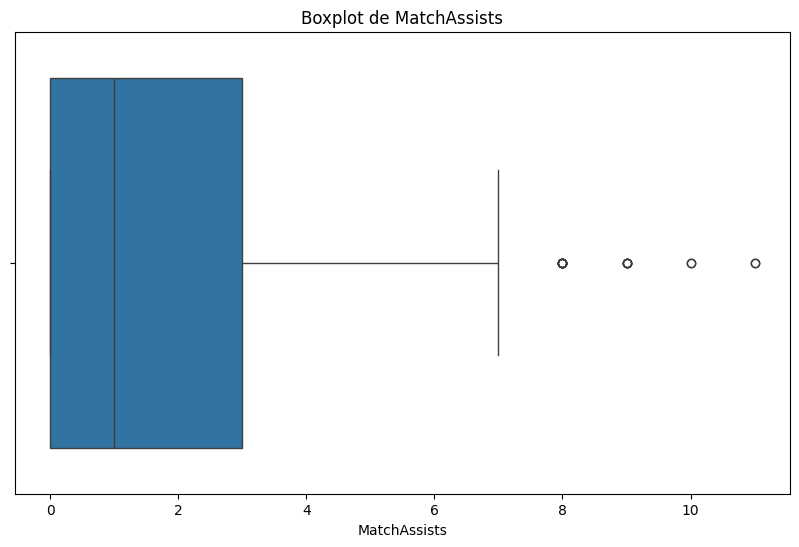

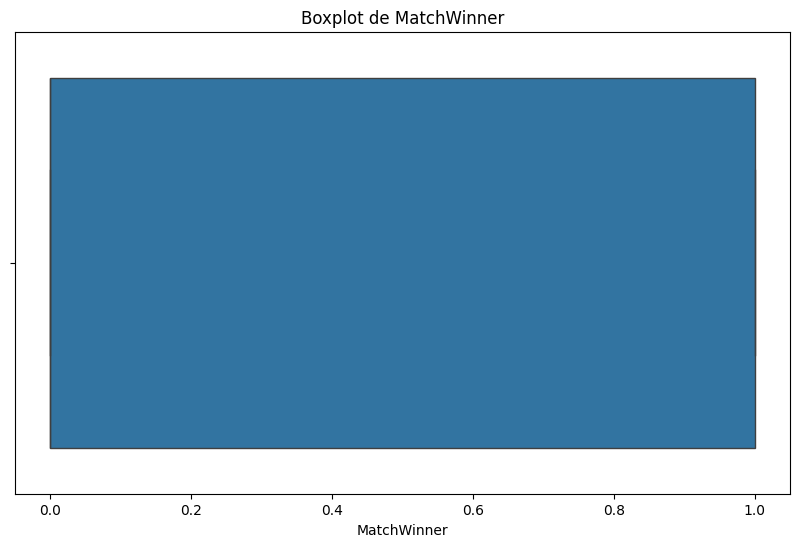

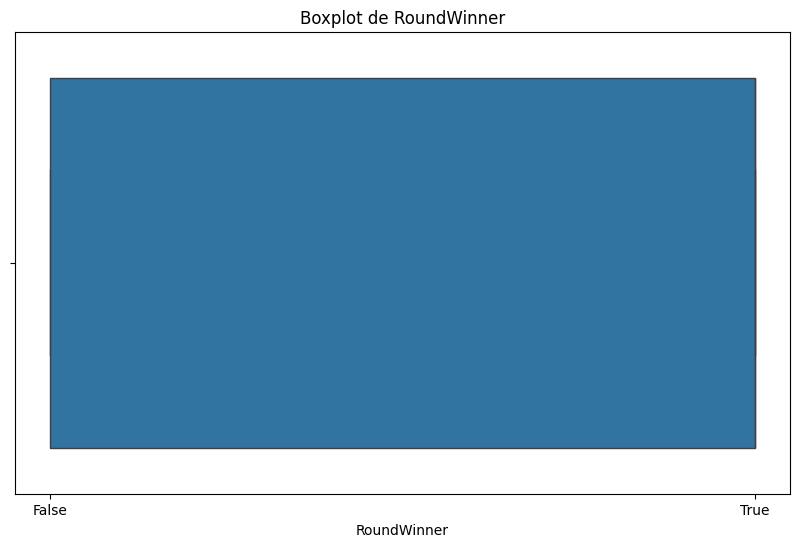

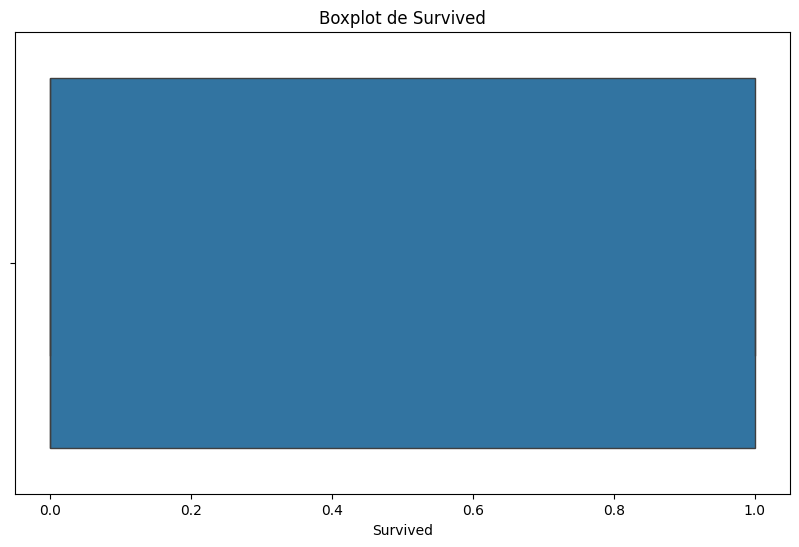

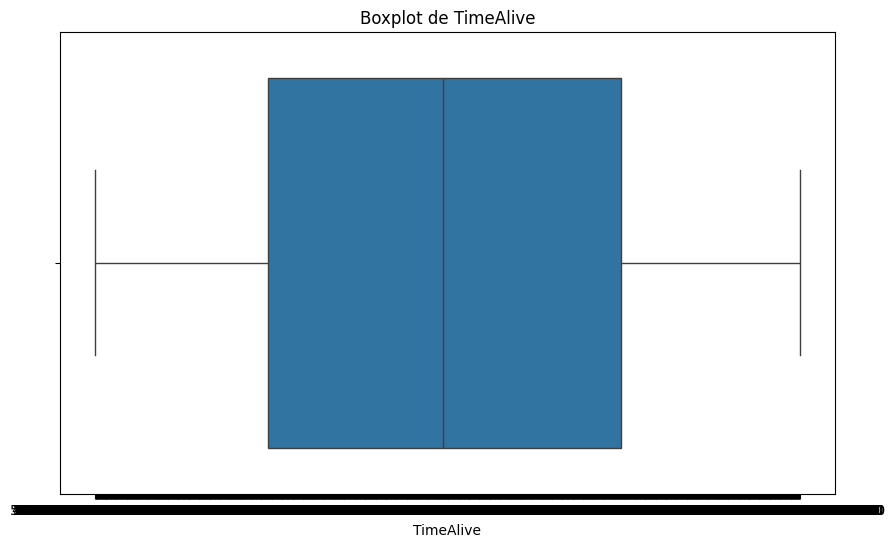

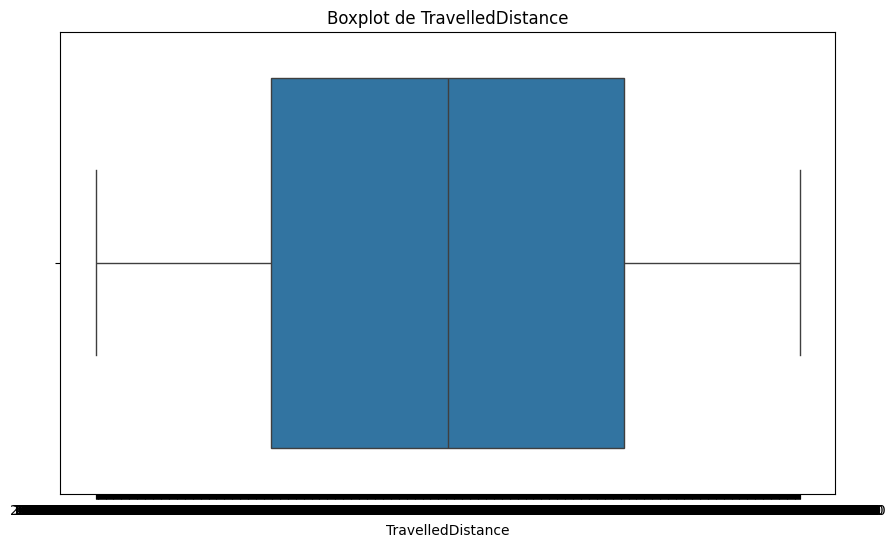

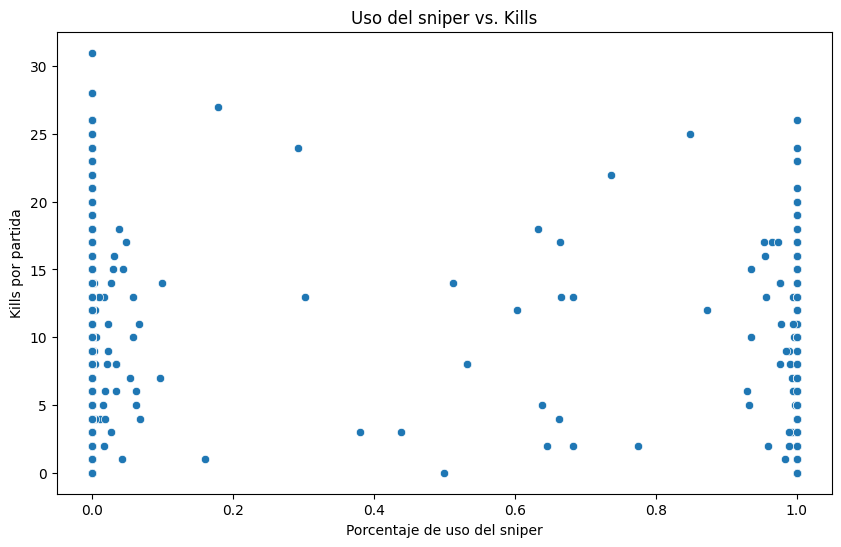

In [9]:

# 2. Muestra aleatoria (para rendimiento si es necesario)
sample_df = df.sample(n=min(1500, len(df)), random_state=42)

# 3. Descripción estadística de variables clave
print("\nDescripción estadística del uso del rifle Sniper:")
print(sample_df['PrimarySniperRifle'].describe())

print("\nDescripción estadística del rendimiento:")
performance_variables = ['MatchKills', 'MatchHeadshots', 'MatchAssists', 'MatchWinner', 'RoundWinner', 'Survived', 'TimeAlive', 'TravelledDistance']
print(sample_df[performance_variables].describe())


# 4. Tipos de datos
print("\nTipos de datos:")
print(sample_df.dtypes)

# 5. Visualización inicial
# Distribución del uso del rifle sniper
plt.figure(figsize=(10, 6))
sns.histplot(sample_df['PrimarySniperRifle'], bins=30, kde=True)
plt.title('Distribución del uso del rifle sniper')
plt.xlabel('Porcentaje de uso')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de variables de rendimiento
for var in performance_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, data=sample_df)
    plt.title(f'Boxplot de {var}')
    plt.show()

# Diagrama de dispersión: Uso del sniper vs. Kills
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PrimarySniperRifle', y='MatchKills', data=sample_df)
plt.title('Uso del sniper vs. Kills')
plt.xlabel('Porcentaje de uso del sniper')
plt.ylabel('Kills por partida')
plt.show()


In [19]:

# Define the model formula
formula = "RoundKills ~ RoundAssists + RoundHeadshots + RoundFlankKills"

# Fit the linear regression model
model = smf.ols(formula, data=df).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             RoundKills   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                 2.844e+04
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:36:29   Log-Likelihood:                -73414.
No. Observations:               79156   AIC:                         1.468e+05
Df Residuals:                   79152   BIC:                         1.469e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3246      0.003    1

In [28]:
import statsmodels.formula.api as smf

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df[['RoundKills', 'RoundAssists', 'RoundHeadshots']]

# Asegurarse de que 'Survived' sea numérico (0 o 1)
# Se asume que 'Survived' es un valor booleano o una cadena que representa un valor booleano.
df['Survived'] = df['Survived'].astype(int)
# Si 'Survived' fuera de tipo cadena, se podría usar:
# df['Survived'] = df['Survived'].map({'True': 1, 'False': 0}).astype(int)
y = df['Survived']

# Crear y entrenar un modelo de regresión logística
model = smf.logit('Survived ~ RoundKills + RoundAssists + RoundHeadshots', data=df).fit()

# Imprimir el resumen del modelo
print(model.summary())

# Ahora se puede utilizar el modelo entrenado para realizar predicciones:
# predictions = model.predict(X_test)



Optimization terminated successfully.
         Current function value: 0.615780
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                79156
Model:                          Logit   Df Residuals:                    79152
Method:                           MLE   Df Model:                            3
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                 0.08695
Time:                        03:39:19   Log-Likelihood:                -48743.
converged:                       True   LL-Null:                       -53384.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9118      0.010    -87.984      0.000      -0.932      -0.892
RoundKills       

## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

In [17]:
import pandas as pd

# Paso 1: Revisar la integridad de los datos
# Se evalúa la cantidad de datos faltantes (NaN) en cada columna para entender la calidad global del dataset.
print("--- Exploración inicial: Datos faltantes ---")
missing_values = df.isnull().sum()  # Se calcula el total de valores perdidos por columna
print("Valores nulos (se muestran solo las columnas afectadas):")
print(missing_values[missing_values > 0])

# Paso 2: Procesamiento de columnas críticas
# Se definen las columnas donde se espera trabajar con valores numéricos y se prevé la limpieza.
columns_to_clean = ['TimeAlive', 'TravelledDistance']
print("\n--- Iniciando procesamiento de las columnas: ---", columns_to_clean)

# Se fuerza la conversión de las columnas seleccionadas a formato numérico para asegurar consistencia en los datos.
print("\nConvirtiendo las columnas a tipo numérico:", columns_to_clean)
for column in columns_to_clean:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Los errores en conversión se convierten en NaN

# Se verifica el impacto de la conversión, contando los nuevos NaN resultantes
new_missing = df[columns_to_clean].isnull().sum()
print("\nCantidad de NaN generados tras la conversión:")
print(new_missing[new_missing > 0])
# Este paso es esencial para identificar posibles problemas en la lectura original de los datos.

# Se eliminan las filas que contengan valores nulos en las columnas clave para asegurar un análisis confiable.
df_clean = df.dropna(subset=columns_to_clean).copy()  # Se crea una copia para evitar efectos secundarios en el DataFrame original
# Además, se reinicia el índice para mantener un orden consecutivo y facilitar futuras operaciones.
df_clean.reset_index(drop=True, inplace=True)
print("\nNúmero total de registros tras eliminar filas con NaN en", columns_to_clean, ":", len(df_clean))

# Paso 3: Confirmación de la limpieza
# Se vuelve a comprobar que las columnas de interés ya no contengan valores faltantes.
print("\n--- Verificación final: Comprobación de valores faltantes en", columns_to_clean, "---")
final_missing = df_clean[columns_to_clean].isnull().sum()
if any(final_missing > 0):
    print("Existen aún valores nulos en las siguientes columnas:")
    print(final_missing[final_missing > 0])
else:
    print("Las columnas han sido limpiadas correctamente y no presentan más valores nulos.")

# Paso 4: Evaluación de la relación entre dos variables críticas
# Se calcula la correlación entre 'TimeAlive' y 'TravelledDistance' para identificar posibles relaciones lineales.
print("\n--- Cálculo del coeficiente de correlación ---")
corr_value = df_clean[['TimeAlive', 'TravelledDistance']].corr().iloc[0, 1]
print("Coeficiente de correlación entre TimeAlive y TravelledDistance:", corr_value)
# Este valor nos aporta insights sobre cómo varían conjuntamente estas dos variables.

# Al finalizar, el DataFrame 'df_clean' está listo para su incorporación en análisis más avanzados o modelado predictivo.
import pandas as pd

# Paso 1: Revisar la integridad de los datos
# Se evalúa la cantidad de datos faltantes (NaN) en cada columna para entender la calidad global del dataset.
print("--- Exploración inicial: Datos faltantes ---")
missing_values = df.isnull().sum()  # Se calcula el total de valores perdidos por columna
print("Valores nulos (se muestran solo las columnas afectadas):")
print(missing_values[missing_values > 0])

# Paso 2: Procesamiento de columnas críticas
# Se definen las columnas donde se espera trabajar con valores numéricos y se prevé la limpieza.
columns_to_clean = ['TimeAlive', 'TravelledDistance']
print("\n--- Iniciando procesamiento de las columnas: ---", columns_to_clean)

# Se fuerza la conversión de las columnas seleccionadas a formato numérico para asegurar consistencia en los datos.
print("\nConvirtiendo las columnas a tipo numérico:", columns_to_clean)
for column in columns_to_clean:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Los errores en conversión se convierten en NaN

# Se verifica el impacto de la conversión, contando los nuevos NaN resultantes
new_missing = df[columns_to_clean].isnull().sum()
print("\nCantidad de NaN generados tras la conversión:")
print(new_missing[new_missing > 0])
# Este paso es esencial para identificar posibles problemas en la lectura original de los datos.

# Se eliminan las filas que contengan valores nulos en las columnas clave para asegurar un análisis confiable.
df_clean = df.dropna(subset=columns_to_clean).copy()  # Se crea una copia para evitar efectos secundarios en el DataFrame original
# Además, se reinicia el índice para mantener un orden consecutivo y facilitar futuras operaciones.
df_clean.reset_index(drop=True, inplace=True)
print("\nNúmero total de registros tras eliminar filas con NaN en", columns_to_clean, ":", len(df_clean))

# Paso 3: Confirmación de la limpieza
# Se vuelve a comprobar que las columnas de interés ya no contengan valores faltantes.
print("\n--- Verificación final: Comprobación de valores faltantes en", columns_to_clean, "---")
final_missing = df_clean[columns_to_clean].isnull().sum()
if any(final_missing > 0):
    print("Existen aún valores nulos en las siguientes columnas:")
    print(final_missing[final_missing > 0])
else:
    print("Las columnas han sido limpiadas correctamente y no presentan más valores nulos.")

# Paso 4: Evaluación de la relación entre dos variables críticas
# Se calcula la correlación entre 'TimeAlive' y 'TravelledDistance' para identificar posibles relaciones lineales.
print("\n--- Cálculo del coeficiente de correlación ---")
corr_value = df_clean[['TimeAlive', 'TravelledDistance']].corr().iloc[0, 1]
print("Coeficiente de correlación entre TimeAlive y TravelledDistance:", corr_value)
# Este valor nos aporta insights sobre cómo varían conjuntamente estas dos variables.

# Al finalizar, el DataFrame 'df_clean' está listo para su incorporación en análisis más avanzados o modelado predictivo.


--- Exploración inicial: Datos faltantes ---
Valores nulos (se muestran solo las columnas afectadas):
TimeAlive            78376
TravelledDistance    78875
dtype: int64

--- Iniciando procesamiento de las columnas: --- ['TimeAlive', 'TravelledDistance']

Convirtiendo las columnas a tipo numérico: ['TimeAlive', 'TravelledDistance']

Cantidad de NaN generados tras la conversión:
TimeAlive            78376
TravelledDistance    78875
dtype: int64

Número total de registros tras eliminar filas con NaN en ['TimeAlive', 'TravelledDistance'] : 70

--- Verificación final: Comprobación de valores faltantes en ['TimeAlive', 'TravelledDistance'] ---
Las columnas han sido limpiadas correctamente y no presentan más valores nulos.

--- Cálculo del coeficiente de correlación ---
Coeficiente de correlación entre TimeAlive y TravelledDistance: nan
--- Exploración inicial: Datos faltantes ---
Valores nulos (se muestran solo las columnas afectadas):
TimeAlive            78376
TravelledDistance    78875
dt

# ¿Cómo influye el porcentaje de uso del rifle sniper (arma primaria) en el rendimiento del jugador, considerando variables como kills, headshots, y probabilidad de ganar la ronda o la partida?

Como el rifle sniper suele estar asociado a headshots, un mayor uso de sniper podría mejorar la efectividad de headshots, pero el modelo logístico indica que un aumento en headshots no necesariamente incrementa la supervivencia (coeficiente negativo en RoundHeadshots en la regresión logística).
___________________
# ¿Podemos predecir si un jugador sobrevivirá a una ronda basándonos en sus estadísticas de desempeño?


RoundKills tiene un efecto positivo muy fuerte sobre la probabilidad de sobrevivir (coef = +0.8972).

RoundAssists y RoundHeadshots tienen efectos negativos moderados y el modelo es estadísticamente significativo (p-value = 0.000), muestra una capacidad predictiva razonable (Pseudo R-squared ≈ 0.087).
____________
# ¿Cuál será el número de kills que un jugador realizará en una ronda en función de su estilo de juego y estadísticas previas?
El número de kills se predice bien en base a estadísticas agresivas: más headshots y más kills por flanqueo llevan a más kills en la ronda. Las asistencias, aunque positivas para el equipo, no aportan directamente a la cantidad de kills individuales.

-------_____________________________________------

*se realizo una regresión Logística para predecir Supervivencia del jugador, una regresion lineal para el numero de killsy una interpretacion de coeficientes*